In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from datetime import timedelta

In [82]:
# Functions

def seconder(x):
    mins, secs = map(float, x.split(':'))
    td = timedelta(minutes = mins, seconds = secs)
    return td.total_seconds()

def process_csv(file_name, csv_name):
    file_name = pd.read_csv(csv_name)
    file_name['Length'] = file_name.Length.apply(seconder).astype('int')
    
def saddest_song(df):
    df = df.sort_values('Valence')
    return df[:1]

def happiest_song(df1):
    df1 = df1.sort_values('Valence', ascending = False)
    return df1[:1]

In [164]:
poon_top = pd.read_csv('PoonTop100.csv')
poon_top['Length'] = poon_top.Length.apply(seconder).astype('int')
ryan_top = pd.read_csv('ryan_top.csv')
ryan_top['Length'] = ryan_top.Length.apply(seconder).astype('int')
ryan_pop = pd.read_csv('ryan_pop_punk.csv')
ryan_pop['Length'] = ryan_pop.Length.apply(seconder).astype('int')
zy_top = pd.read_csv('zy_top.csv')
zy_top['Length'] = zy_top.Length.apply(seconder).astype('int')
sk_top = pd.read_csv('sk_top.csv')
sk_top['Length'] = sk_top.Length.apply(seconder).astype('int')
sk_emo = pd.read_csv('sk_emo.csv')
sk_emo['Length'] = sk_emo.Length.apply(seconder).astype('int')
try:
    wh_top = pd.read_csv('wh_top.csv')
    wh_top['Length'] = wh_top.Length.apply(seconder).astype('int')
except:
    pass
ryan_top = pd.concat([ryan_top, ryan_pop], ignore_index = True)
sk_top = pd.concat([sk_top, sk_emo], ignore_index = True)

,ID,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND
0,1,"你,好不好? - TVBS連續劇【遺憾拼圖】片尾曲",Eric Chou,5/8/16,160.0,48.0,44.0,-6.0,54.0,4:47,64.0,66.0,3104.0
1,2,I Don't Even Know Your Name,Shawn Mendes,13/4/15,85.0,52.0,63.0,-6.0,56.0,3:00,1.0,0.0,1756.0
2,3,Memories,Shawn Mendes,20/11/15,107.0,17.0,49.0,-9.0,30.0,3:53,79.0,0.0,1313.0
3,4,Can I Be Him,James Arthur,28/10/16,108.0,54.0,70.0,-6.0,48.0,4:07,31.0,80.0,3583.0
4,5,It's Gotta Be You,Isaiah Firebrace,21/11/16,92.0,73.0,32.0,-5.0,59.0,3:11,22.0,58.0,2872.0
5,6,What Are Words,Chris Medina,28/11/11,124.0,24.0,60.0,-7.0,46.0,3:09,84.0,60.0,5249.0
6,7,Jealous,Labrinth,21/11/14,117.0,15.0,44.0,-9.0,10.0,4:48,87.0,6.0,1208.0
7,8,Dancing On My Own - Acoustic,Calum Scott,17/6/16,118.0,8.0,53.0,-11.0,44.0,4:13,95.0,0.0,8942.0
8,9,That Should Be Me,Justin Bieber,1/1/11,140.0,63.0,47.0,-7.0,30.0,3:51,3.0,59.0,5835.0
9,10,Not Over You,Gavin DeGraw,16/9/11,142.0,89.0,63.0,-5.0,36.0,3:39,26.0,72.0,7565.0


In [ ]:
spotify_top_2000 = pd.read_csv('Spotify-2000.csv')
spotify_top_2000.head()


In [161]:
# Print comparison radar chart

categories = ['Energy', 'Dance', 'Valence', 'Acoustic', 'Pop.']
categories = [*categories, categories[0]]

poon = poon_top[['Energy', 'Dance', 'Valence','Acoustic', 'Pop.']].mean()
poon = [*poon, poon[0]]
ryan = ryan_top[['Energy', 'Dance', 'Valence','Acoustic', 'Pop.']].mean()
ryan = [*ryan, ryan[0]]
zy = zy_top[['Energy', 'Dance', 'Valence','Acoustic', 'Pop.']].mean()
zy = [*zy, zy[0]]
wh = wh_top[['Energy', 'Dance', 'Valence','Acoustic', 'Pop.']].mean()
wh = [*wh, wh[0]]
sk = sk_top[['Energy', 'Dance', 'Valence','Acoustic', 'Pop.']].mean()
sk = [*sk, sk[0]]

fig_poon = go.Figure(
    data=[
        go.Scatterpolar(r=poon, theta=categories, name='poon', fill = 'toself', line=dict(color="purple"), fillcolor = 'blue', opacity=0.4),
    ],
    layout=go.Layout(
        title=go.layout.Title(text="Poon's Songs"),
        polar={'radialaxis': {'visible': True}},
    )
)

fig_ryan = go.Figure(
    data=[

        go.Scatterpolar(r=ryan, theta=categories, name='ryan', fill = 'toself', line=dict(color="red"), fillcolor = 'orange', opacity=0.6),
    ],
    layout=go.Layout(
        title=go.layout.Title(text="Ryan's Songs"),
        polar={'radialaxis': {'visible': True}},
    )
)

fig_sk = go.Figure(
    data=[

        go.Scatterpolar(r=sk, theta=categories, name='shi kai', fill = 'toself', line=dict(color="red"), fillcolor = 'green', opacity=0.6),
    ],
    layout=go.Layout(
        title=go.layout.Title(text="Shi Kai's Songs"),
        polar={'radialaxis': {'visible': True}},
    )
)

fig_wh = go.Figure(
    data=[

        go.Scatterpolar(r=wh, theta=categories, name='wei hern', fill = 'toself', line=dict(color="orange"), fillcolor = 'red', opacity=0.6),
    ],
    layout=go.Layout(
        title=go.layout.Title(text="Wei Hern's Songs"),
        polar={'radialaxis': {'visible': True}},
    )
)

fig_zy = go.Figure(
    data=[

        go.Scatterpolar(r=zy, theta=categories, name='zong yao', fill = 'toself', line=dict(color="blue"), fillcolor = 'purple', opacity=0.5),
    ],
    layout=go.Layout(
        title=go.layout.Title(text="Zong Yao's Songs"),
        polar={'radialaxis': {'visible': True}},
    )
)


fig_poon.show()
fig_ryan.show()
fig_sk.show()
fig_wh.show()
fig_zy.show()

In [136]:
poon_top[['user']] = "Poon"
ryan_top[['user']] = "Ryan"
zy_top[['user']] = "Zy"
wh_top[['user']] = "Wh"
sk_top[['user']] = "SK"
overall = pd.concat([poon_top, ryan_top, zy_top, wh_top, sk_top], ignore_index = True)
overall

,ID,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND,user
0,1,good 4 u,Olivia Rodrigo,21/5/21,167.0,66.0,56.0,-5.0,69.0,178,34.0,95.0,3041.0,Poon
1,2,Levitating (feat. DaBaby),Dua Lipa,1/10/20,103.0,83.0,70.0,-4.0,92.0,203,1.0,85.0,3271.0,Poon
2,3,STAY (with Justin Bieber),The Kid LAROI,9/7/21,170.0,76.0,59.0,-5.0,48.0,142,4.0,97.0,1064.0,Poon
3,4,Bad Habits,Ed Sheeran,25/6/21,126.0,90.0,81.0,-4.0,59.0,231,5.0,55.0,7668.0,Poon
4,5,Leave Before You Love Me (with Jonas Brothers),Marshmello,21/5/21,120.0,74.0,72.0,-5.0,64.0,155,0.0,88.0,6597.0,Poon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,50,You Are My Sunshine,Johnny Cash,1/1/03,90.0,26.0,42.0,-15.0,56.0,197,84.0,62.0,7218.0,SK
442,51,Can't Help Falling in Love,Elvis Presley,20/10/61,100.0,29.0,40.0,-14.0,34.0,182,94.0,81.0,2031.0,SK
443,52,Falling,Harry Styles,13/12/19,110.0,27.0,57.0,-7.0,6.0,240,84.0,88.0,3899.0,SK
444,53,Fragile,Kygo,18/3/16,150.0,42.0,47.0,-7.0,22.0,231,18.0,71.0,5764.0,SK


In [130]:
saddest = pd.concat([saddest_song(poon_top), saddest_song(zy_top), saddest_song(ryan_top), saddest_song(wh_top), saddest_song(sk_top)])
saddest

,ID,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND,user
62,63,you broke me first,Tate McRae,17/4/20,124.0,37.0,67.0,-9.0,8.0,169,79.0,89.0,3715.0,Poon
90,91,drivers license,Olivia Rodrigo,8/1/21,144.0,44.0,59.0,-9.0,13.0,242,72.0,35.0,1143.0,Zy
33,34,Easy On Me,Adele,19/11/21,142.0,37.0,60.0,-8.0,13.0,225,58.0,90.0,3066.0,Ryan
45,46,Falling,Harry Styles,13/12/19,110.0,27.0,57.0,-7.0,6.0,4:00,84.0,88.0,3135.0,Wh
80,52,Falling,Harry Styles,13/12/19,110.0,27.0,57.0,-7.0,6.0,240,84.0,88.0,3899.0,SK


In [131]:
happiest = pd.concat([happiest_song(poon_top), happiest_song(zy_top), happiest_song(ryan_top), happiest_song(wh_top), happiest_song(sk_top)])
happiest

,ID,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,RND,user
98,99,Cold Heart - PNAU Remix,Elton John,13/8/21,116.0,80.0,80.0,-6.0,94.0,203,3.0,96.0,7354.0,Poon
60,61,You're the One,The Vogues,1/1/09,143.0,63.0,45.0,-9.0,93.0,131,76.0,57.0,5694.0,Zy
30,31,Cold Heart - PNAU Remix,Elton John,13/8/21,116.0,80.0,80.0,-6.0,94.0,203,3.0,96.0,4111.0,Ryan
33,34,7 Minutes,Dean Lewis,18/1/19,105.0,74.0,61.0,-6.0,71.0,3:31,53.0,66.0,8727.0,Wh
46,18,Crocodile Rock,Elton John,22/1/73,150.0,80.0,62.0,-7.0,97.0,235,3.0,75.0,9667.0,SK


In [162]:
df_mean = overall[['user', 'Energy', 'Dance', 'Valence', 'Acoustic', 'Pop.', 'BPM']]
df_mean

,user,Energy,Dance,Valence,Acoustic,Pop.,BPM,Length
0,Poon,66.0,56.0,69.0,34.0,95.0,167.0,178
1,Poon,83.0,70.0,92.0,1.0,85.0,103.0,203
2,Poon,76.0,59.0,48.0,4.0,97.0,170.0,142
3,Poon,90.0,81.0,59.0,5.0,55.0,126.0,231
4,Poon,74.0,72.0,64.0,0.0,88.0,120.0,155
...,...,...,...,...,...,...,...,...
441,SK,26.0,42.0,56.0,84.0,62.0,90.0,197
442,SK,29.0,40.0,34.0,94.0,81.0,100.0,182
443,SK,27.0,57.0,6.0,84.0,88.0,110.0,240
444,SK,42.0,47.0,22.0,18.0,71.0,150.0,231


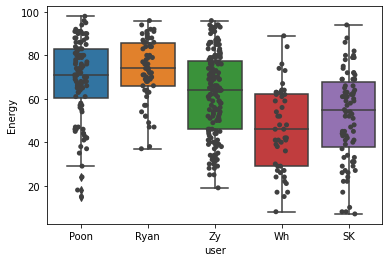

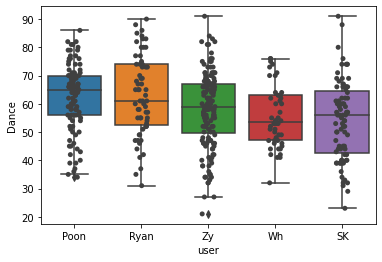

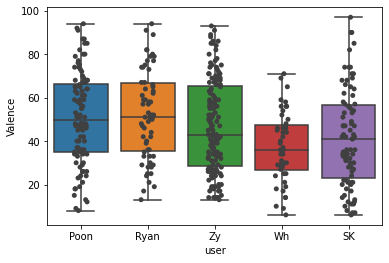

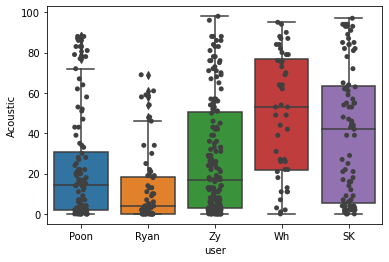

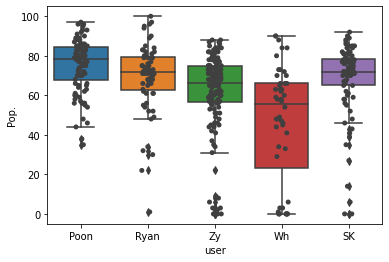

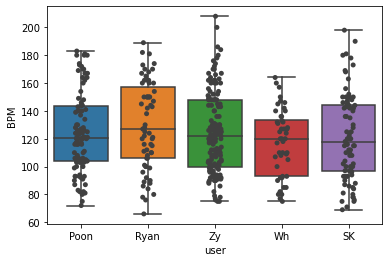

In [167]:
for i in range(6):
    sns.boxplot(x = 'user', y = df_mean.iloc[:, i + 1], data = df_mean)
    sns.stripplot(x="user", y=df_mean.iloc[:, i + 1], data=df_mean, color=".25")
    plt.show()